## Project : Breast Cancer Survival

**Project Brief:** 
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

**Attribute informations:**
- Age of patient at time of operation (numerical) 
- Patient's year of operation (year - 1900, numerical) 
- Number of positive axillary nodes detected (numerical) 
- Survival status (class attribute) 

**Objective:**
- To predict  patient survival after 5 years of operation basis various attributes : 
  Age of patient, year of operation and positive axillary node

In [1]:
import numpy as np                                          
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                    
import seaborn as sns   
sns.set()

**Importing the Dataset : From local drive (downloaded data from Github)

In [2]:
data = pd.read_csv("C:/Users/jigna.thacker/Desktop/Project-data/Breast_cancer_survival.csv") 

In [3]:
data.shape

(306, 4)

In [4]:
data.columns

Index(['Age', 'Years_of_operation', 'Pos_axillary_nodes', 'Status'], dtype='object')

In [5]:
data.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [11]:
data.dtypes

Age                   int64
Years_of_operation    int64
Pos_axillary_nodes    int64
Status                int64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [9]:
data.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
data.isnull().sum()

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

In [12]:
data.columns = map(str.lower, data.columns)

In [13]:
data.isnull().sum()

age                   0
years_of_operation    0
pos_axillary_nodes    0
status                0
dtype: int64

**Observations** : 
- Total sample of 306 with 4 area of information  on Age of Patient, year of operation , Pos axillary nodes and survival status   with respect to 5 years. 
- No missing value found in the given data set
- Dataset has 17 duplicate rows but considered as "valid dataset"
- pos_axillary_nodes has 44% "zero" value

In [13]:
print("Survival status count: \n", data.status.value_counts())

Survival status count: 
 1    225
2     81
Name: status, dtype: int64


In [16]:
print("patient survived 5 years or longer : \n",225/306*100)

patient survived 5 years or longer : 
 73.52941176470588


In [18]:
print("patient died within 5 year : \n",81/306*100)

patient died within 5 year : 
 26.47058823529412


**Observations** : 
- Patient survived 5 years or longer are 73.5% i.e. sample of 225 and 
- pateint died withing 5 years are 26.5%, i.e. sample of 81. 

In [19]:
profile = pandas_profiling.ProfileReport(data)
profile.to_file(outputfile="Breast_cancer_survival_before_preprocessing.html")

**Objective :** 
- Q1 : How many survive after 5 years 

Text(0.5, 1.0, 'Status on survived after 5 years : 1- Yes and 2-No')

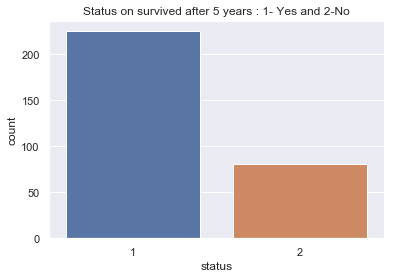

In [16]:
sns.countplot(x='status', data=data).set_title('Status on survived after 5 years : 1- Yes and 2-No')

**Objective :** 
- Q2 : Age distribution by survival status 

In [26]:
## Converting data in class
data['age_class'] = pd.cut(data['age'],
                         [30,40,50,60,90],
                         labels=['upto 40 years','41-50 Years','51-60 Years','Above 60 Years'], include_lowest=True)
data.groupby(['age_class'])['age_class'].count()

age_class
upto 40 years     43
41-50 Years       93
51-60 Years       93
Above 60 Years    77
Name: age_class, dtype: int64

In [31]:
## Converting data for survival=1 i.e. after 5 years
data['survival_1'] = pd.cut(data['status'],
                         [0,1],
                         labels=['Survive after 5 years'], include_lowest=True)
data.groupby(['survival_1'])['survival_1'].count()

survival_1
Survive after 5 years    225
Name: survival_1, dtype: int64

In [33]:
## Survival=1 i.e 5 years and above by age class
data.groupby(['age_class','survival_1'])['survival_1'].count()

age_class       survival_1           
upto 40 years   Survive after 5 years    39
41-50 Years     Survive after 5 years    64
51-60 Years     Survive after 5 years    67
Above 60 Years  Survive after 5 years    55
Name: survival_1, dtype: int64

**Observations:**
- Out of 306 observations - 225 are survived more than 5 years
- Looking at afe group:

Age Class	     Total	Survived more than 5 years   	% 
upto 40 Years	 43	    39	                            91
41-50 Years	     93	    64	                            69
51-60 Years	     93	    67	                            72
Above 60 Years	 77	    55	                            71

- Upto age 40 survival more than 5 year rate is higher

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'pos_axillary_node_count vs patient_age')

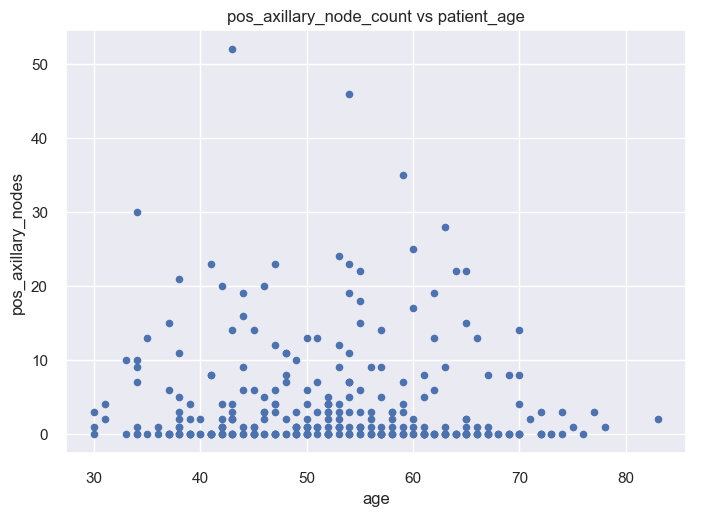

In [47]:
plot=data.plot.scatter(x='age', y='pos_axillary_nodes')
plt.title("pos_axillary_node_count vs patient_age")


**Observations:**
- Most of the pos_axillary_nodes detected between 0 to 5

Text(0.5, 1.0, 'Correlation between variables')

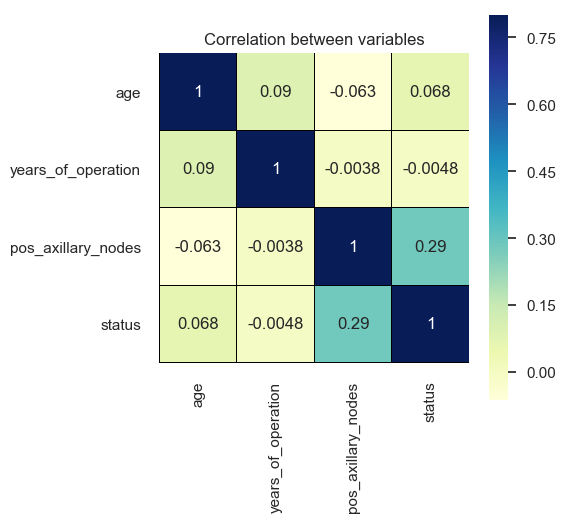

In [71]:
corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between variables')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


NameError: name 'pyplot' is not defined

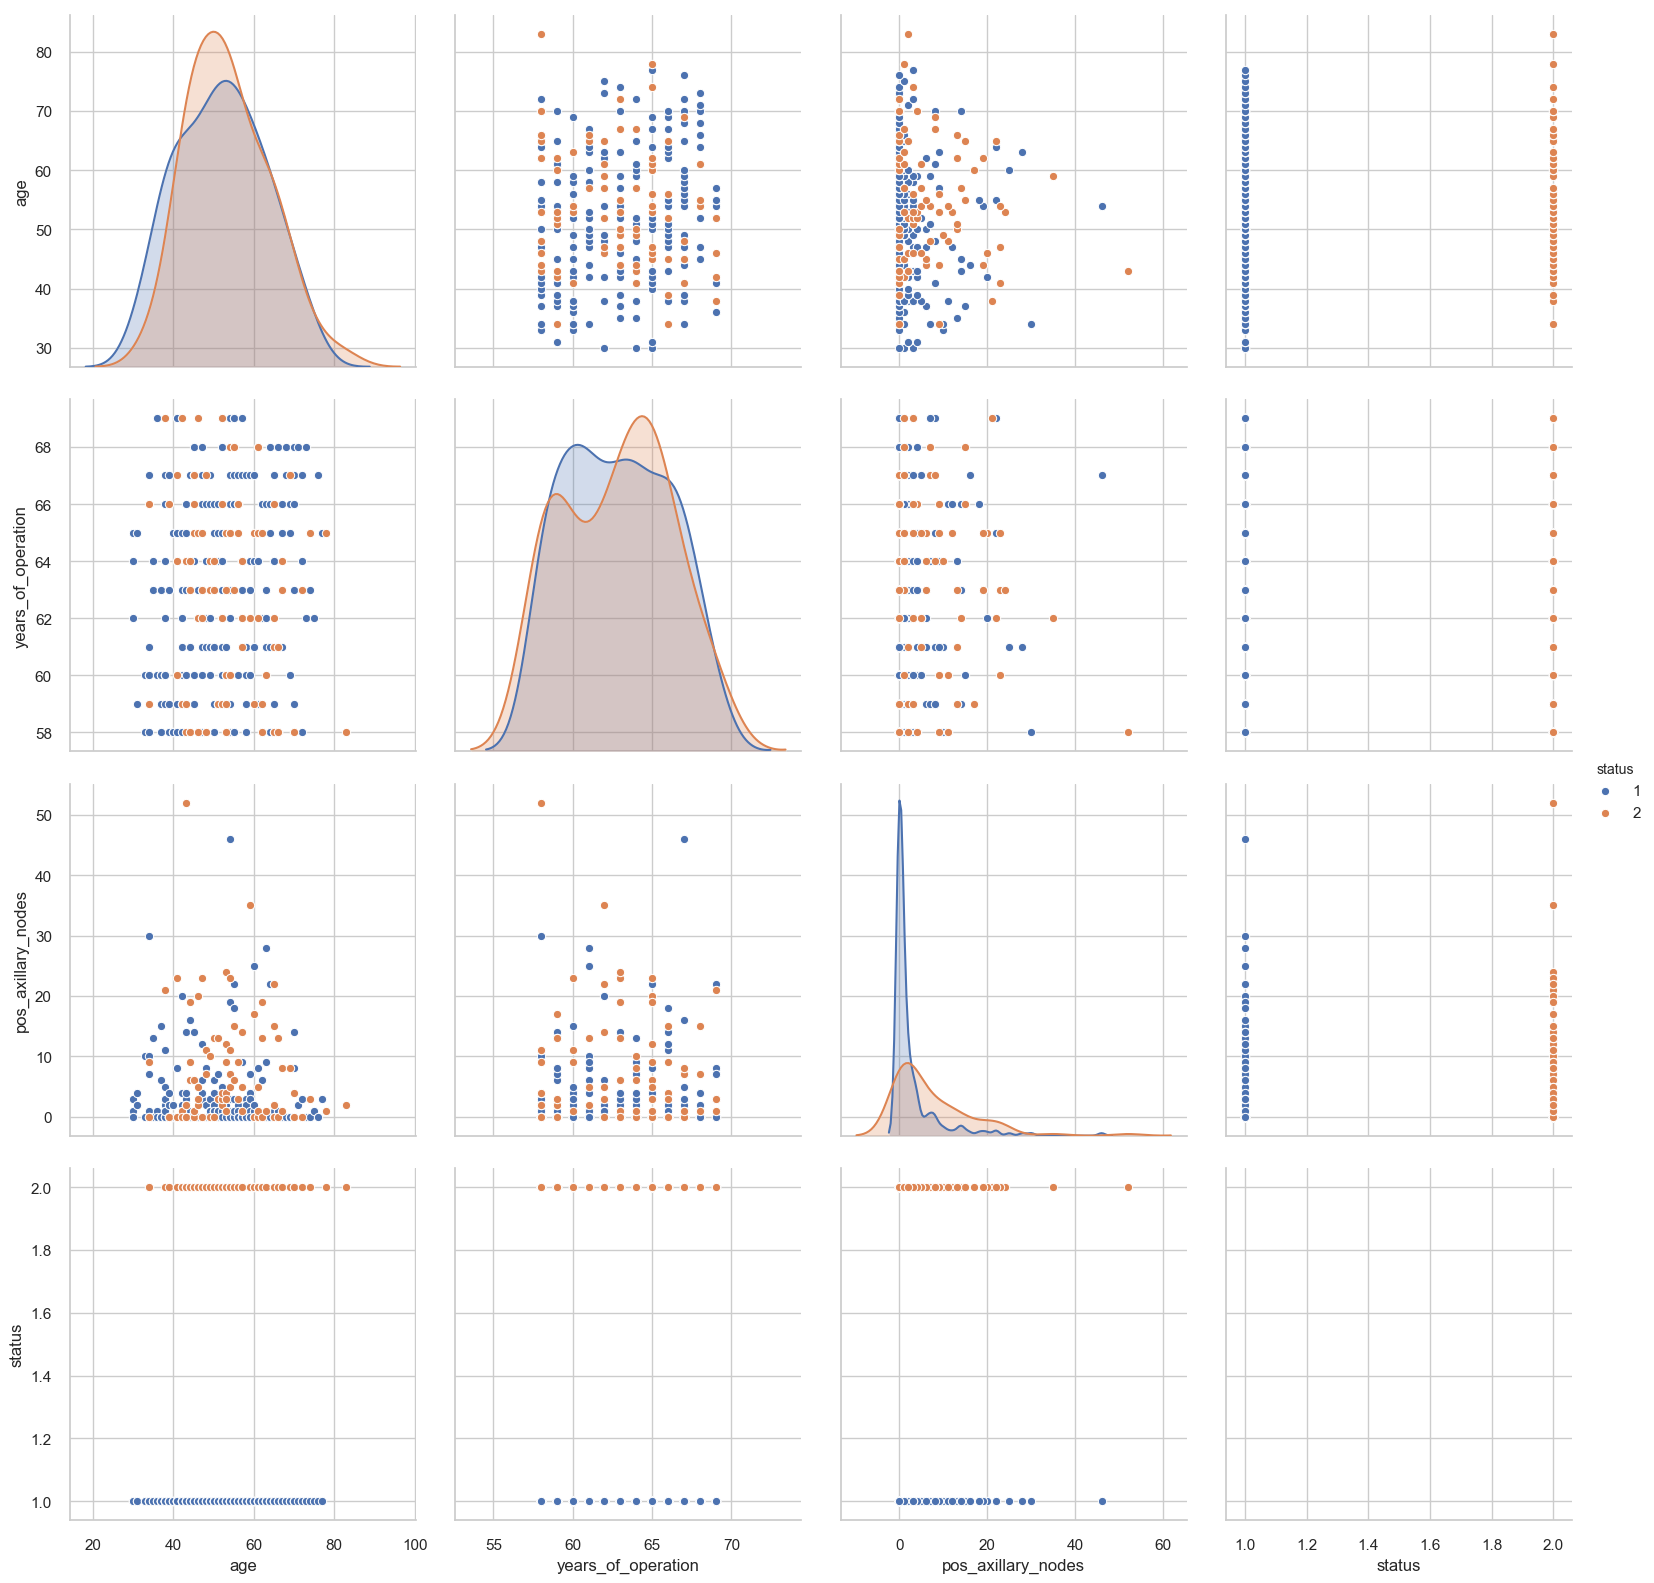

In [74]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="status", size=4)
pyplot.title("Pair plot to identify thefeatues to classify the patients data")
pyplot.show()

**Observations:**

- Survival status is the only way to classified patient
- Another option is age and axillary nodes but again bigger chunk of data falls under "0" nodes hence current dataset is not     robast enough for further deep dive
- Difficut to get pattern in data

Text(0.5, 1.0, 'Survived after 5 years by year of operation')

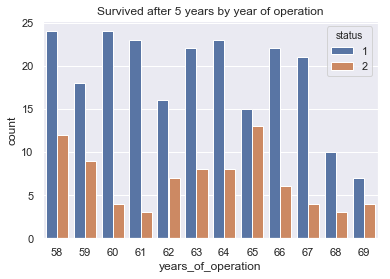

In [35]:
# Distribution of year of operation and survival status

sns.countplot(x='years_of_operation', data=data, hue='status').set_title('Survived after 5 years by year of operation')

Text(0.5, 1.0, 'Survival basis years of operation')

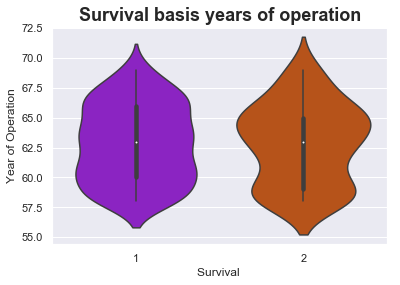

In [43]:
ax = sns.violinplot(x="status", y="years_of_operation", palette="gnuplot", data=data)
plt.xlabel("Survival ")
plt.ylabel("Year of Operation")
plt.title("Survival basis years of operation", fontsize=18, fontweight = "bold")

**Observations:**

- No clear conclusion on survival basis years of operation. In all years survival for more than 5 years is high
- Year of operation is no valid parameter to predict impact on survival more than 5 years

Text(0.5, 1.0, 'Survival basis pos axillary nodes')

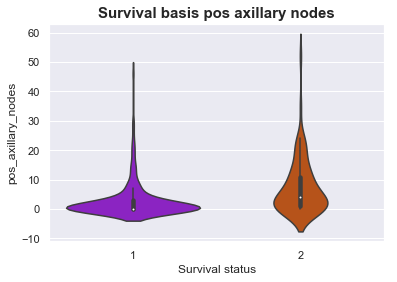

In [41]:
ax = sns.violinplot(x="status", y="pos_axillary_nodes", palette="gnuplot", data=data)
plt.xlabel("Survival status")
plt.ylabel("pos_axillary_nodes")
plt.title("Survival basis pos axillary nodes", fontsize=15, fontweight = "bold")

**Observation:**

- Survival for more than 5 years is higher for positive node at “Zero”
- Survival for less than 5 years is where positive axillary nodes are higher than 1
- There are few cases where chances of survival more than 5 years is there even if positive axillary node > 30 

**Summary:-**

- Looking at basic profiling – there are 17 duplicate cases. 
  Considered as "valid dataset“  as age is one of the variable and is in completed year
- In all 73.5 % patients survived more than 5 years
- In all 91% patients who are upto age 40 – survived more than 5 years
- Positive correlation between survival more than 5 years and positive axillary node:
  With node “zero” survived more than 5 yeas are higher
- Out of all 4 variables -  year of operation is not giving any conclusion for survival more than 5 years

## THANK YOU ##